Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 500_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:57:31 2025 +0200) (508.39ms elap...,0.361,0.0321,0.454,1.09,0.17,11.51,53.77 C,Nominal
1,(Sat Apr 5 08:57:31 2025 +0200) (508.67ms elap...,1.380,0.0690,0.517,2.10,0.37,28.56,53.77 C,Nominal
2,(Sat Apr 5 08:57:32 2025 +0200) (508.15ms elap...,0.268,0.0306,0.415,0.87,0.17,11.75,53.40 C,Nominal
3,(Sat Apr 5 08:57:32 2025 +0200) (507.25ms elap...,0.250,0.0416,0.416,0.85,0.17,11.46,53.40 C,Nominal
4,(Sat Apr 5 08:57:33 2025 +0200) (508.10ms elap...,0.246,0.0354,0.410,0.84,0.16,11.40,53.01 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(2661, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:57:43 2025 +0200) (1007.80ms ela...,38.1,0.0802,1.200,41.07,3.90,98.69,52.64 C,Nominal
1,(Sat Apr 5 08:57:44 2025 +0200) (1004.91ms ela...,35.7,0.0498,0.702,38.62,3.79,98.73,57.22 C,Nominal
2,(Sat Apr 5 08:57:45 2025 +0200) (1004.46ms ela...,35.8,0.0509,0.693,38.72,3.80,98.71,60.36 C,Nominal
3,(Sat Apr 5 08:57:46 2025 +0200) (1004.35ms ela...,37.6,0.0527,0.754,40.61,3.91,98.30,62.98 C,Nominal
4,(Sat Apr 5 08:57:47 2025 +0200) (1004.99ms ela...,36.8,0.0555,0.726,39.83,3.84,98.27,65.75 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 09:51:22 2025 +0200) (511.56ms elap...,0.1020,0.0000,0.263,0.29,0.05,4.16,42.48 C,Nominal
1,(Sat Apr 5 09:51:23 2025 +0200) (508.04ms elap...,1.1600,0.0321,0.374,1.51,0.25,21.80,42.60 C,Nominal
2,(Sat Apr 5 09:51:23 2025 +0200) (508.69ms elap...,0.1060,0.0000,0.257,0.27,0.06,4.10,42.60 C,Nominal
3,(Sat Apr 5 09:51:24 2025 +0200) (507.88ms elap...,0.0566,0.0000,0.274,0.22,0.03,2.44,42.65 C,Nominal
4,(Sat Apr 5 09:51:24 2025 +0200) (507.20ms elap...,0.0650,0.0000,0.261,0.29,0.03,2.52,42.65 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(2868, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 09:51:34 2025 +0200) (1009.95ms ela...,11.70,0.0,0.911,12.59,1.39,99.02,43.84 C,Nominal
1,(Sat Apr 5 09:51:35 2025 +0200) (1006.59ms ela...,9.74,0.0,1.310,10.87,1.01,99.64,46.28 C,Nominal
2,(Sat Apr 5 09:51:36 2025 +0200) (1006.48ms ela...,10.30,0.0,0.946,11.20,1.20,98.96,47.87 C,Nominal
3,(Sat Apr 5 09:51:37 2025 +0200) (1006.90ms ela...,9.70,0.0,1.340,10.84,1.01,99.65,49.15 C,Nominal
4,(Sat Apr 5 09:51:38 2025 +0200) (1005.59ms ela...,15.10,0.0,1.270,17.07,1.62,98.66,50.16 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:57:31,0.361,0.0321,0.454,1.09,0.17,11.51,53.77,Nominal,508.39
1,2025-04-05 08:57:31,1.380,0.0690,0.517,2.10,0.37,28.56,53.77,Nominal,508.67
2,2025-04-05 08:57:32,0.268,0.0306,0.415,0.87,0.17,11.75,53.40,Nominal,508.15
3,2025-04-05 08:57:32,0.250,0.0416,0.416,0.85,0.17,11.46,53.40,Nominal,507.25
4,2025-04-05 08:57:33,0.246,0.0354,0.410,0.84,0.16,11.40,53.01,Nominal,508.10


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(2661, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:57:43,38.1,0.0802,1.200,41.07,3.90,98.69,52.64,Nominal,1007.80
1,2025-04-05 08:57:44,35.7,0.0498,0.702,38.62,3.79,98.73,57.22,Nominal,1004.91
2,2025-04-05 08:57:45,35.8,0.0509,0.693,38.72,3.80,98.71,60.36,Nominal,1004.46
3,2025-04-05 08:57:46,37.6,0.0527,0.754,40.61,3.91,98.30,62.98,Nominal,1004.35
4,2025-04-05 08:57:47,36.8,0.0555,0.726,39.83,3.84,98.27,65.75,Nominal,1004.99


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 09:51:22,0.1020,0.0000,0.263,0.29,0.05,4.16,42.48,Nominal,511.56
1,2025-04-05 09:51:23,1.1600,0.0321,0.374,1.51,0.25,21.80,42.60,Nominal,508.04
2,2025-04-05 09:51:23,0.1060,0.0000,0.257,0.27,0.06,4.10,42.60,Nominal,508.69
3,2025-04-05 09:51:24,0.0566,0.0000,0.274,0.22,0.03,2.44,42.65,Nominal,507.88
4,2025-04-05 09:51:24,0.0650,0.0000,0.261,0.29,0.03,2.52,42.65,Nominal,507.20


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(2868, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 09:51:34,11.70,0.0,0.911,12.59,1.39,99.02,43.84,Nominal,1009.95
1,2025-04-05 09:51:35,9.74,0.0,1.310,10.87,1.01,99.64,46.28,Nominal,1006.59
2,2025-04-05 09:51:36,10.30,0.0,0.946,11.20,1.20,98.96,47.87,Nominal,1006.48
3,2025-04-05 09:51:37,9.70,0.0,1.340,10.84,1.01,99.65,49.15,Nominal,1006.90
4,2025-04-05 09:51:38,15.10,0.0,1.270,17.07,1.62,98.66,50.16,Nominal,1005.59


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


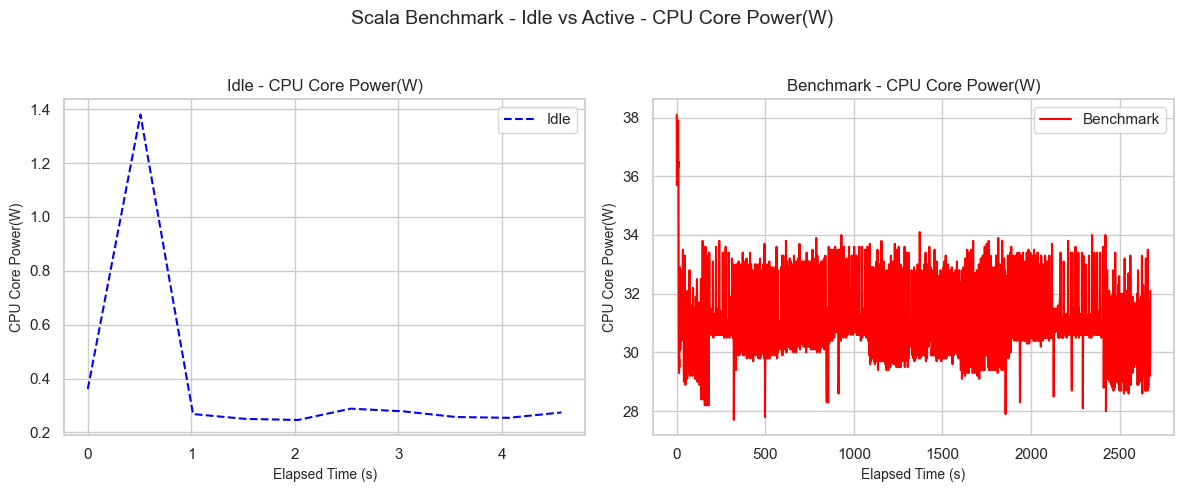

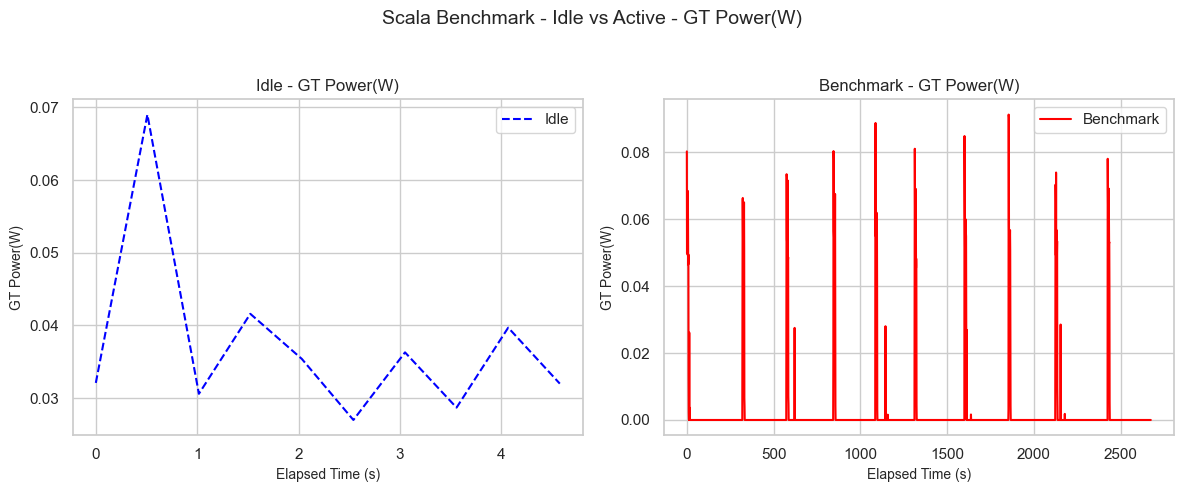

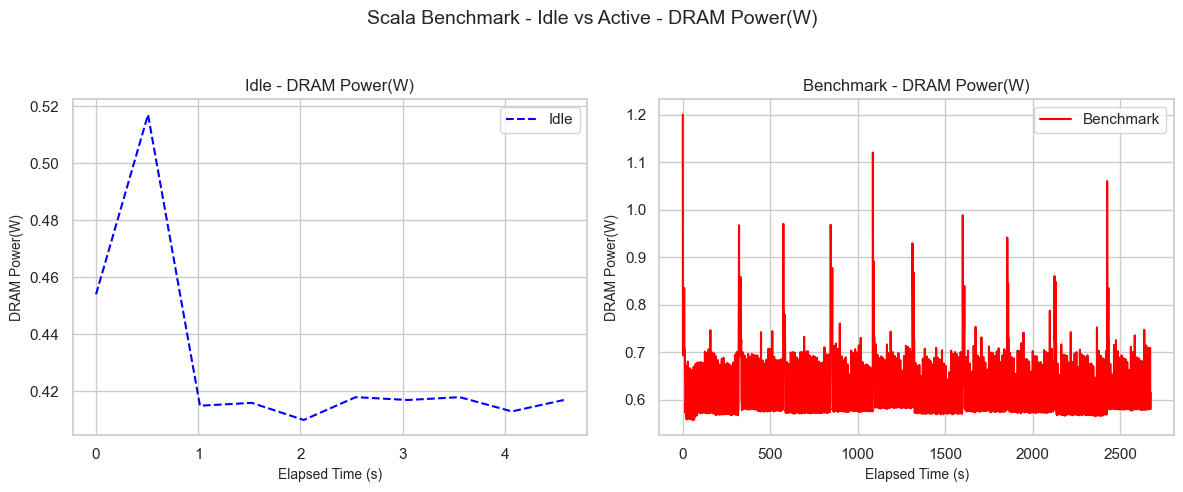

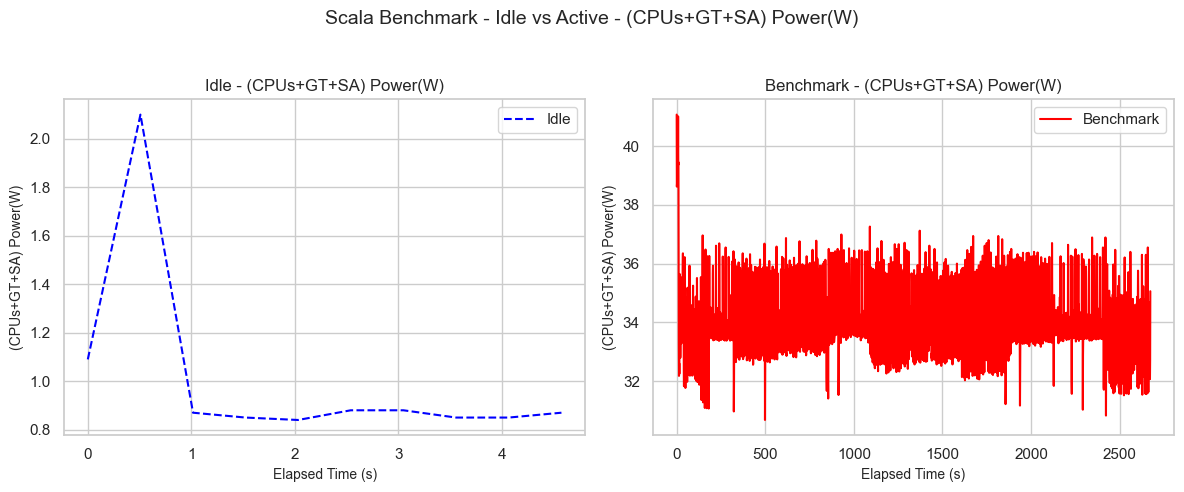

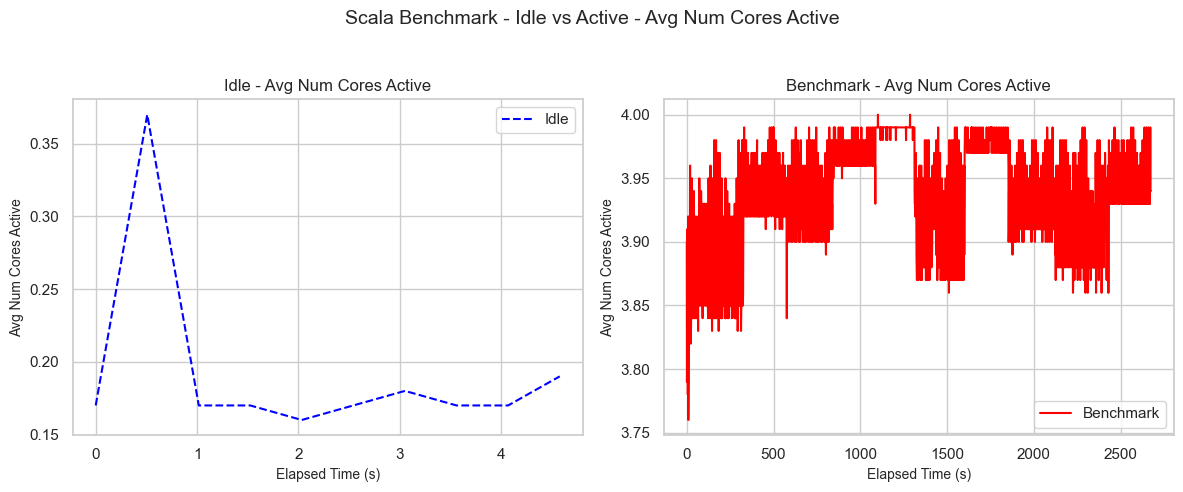

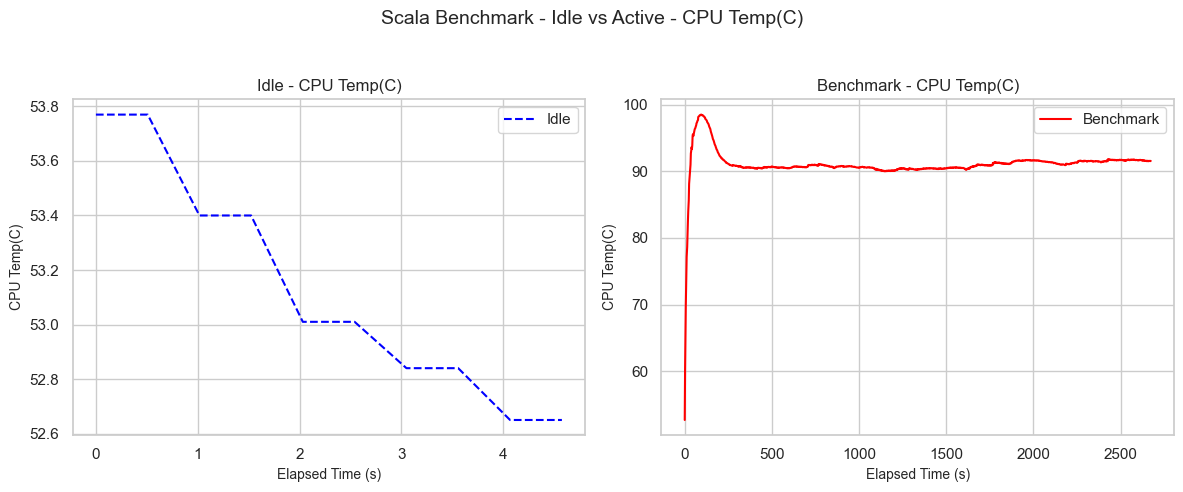

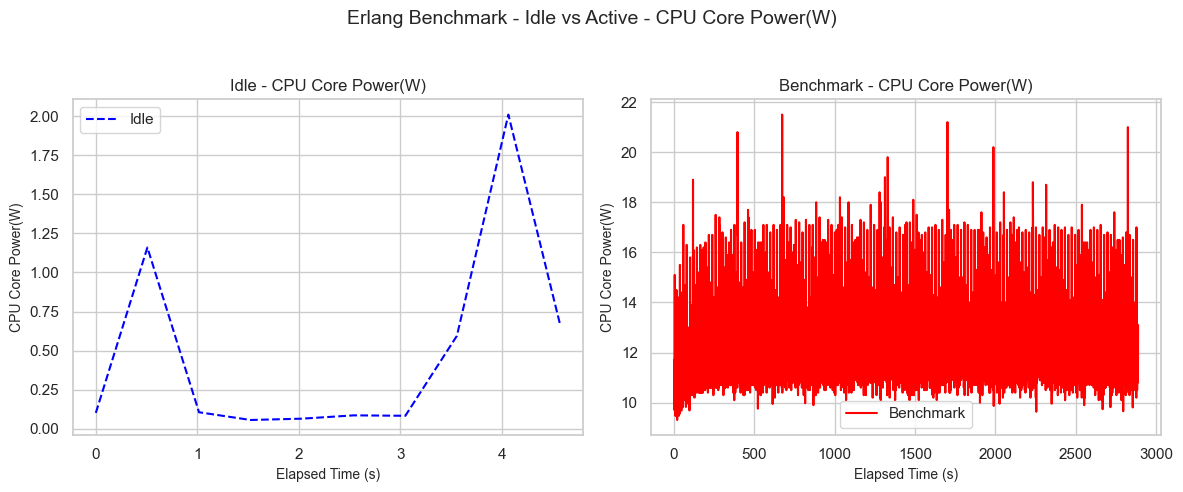

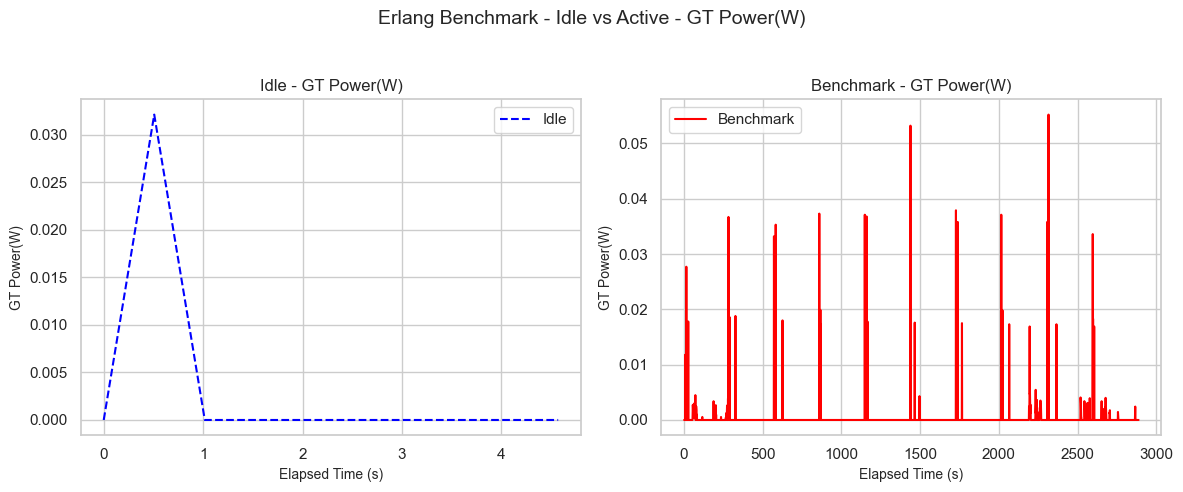

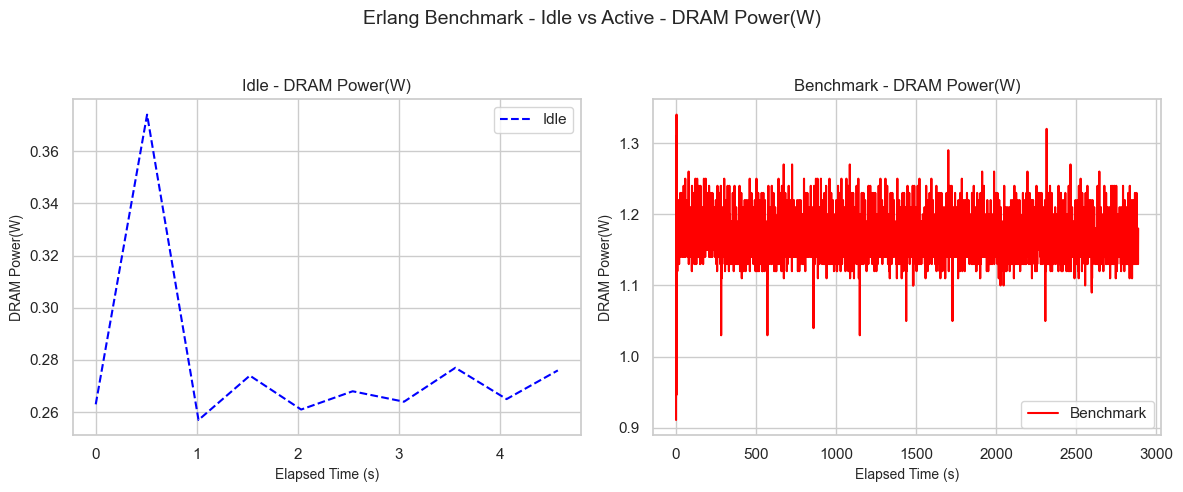

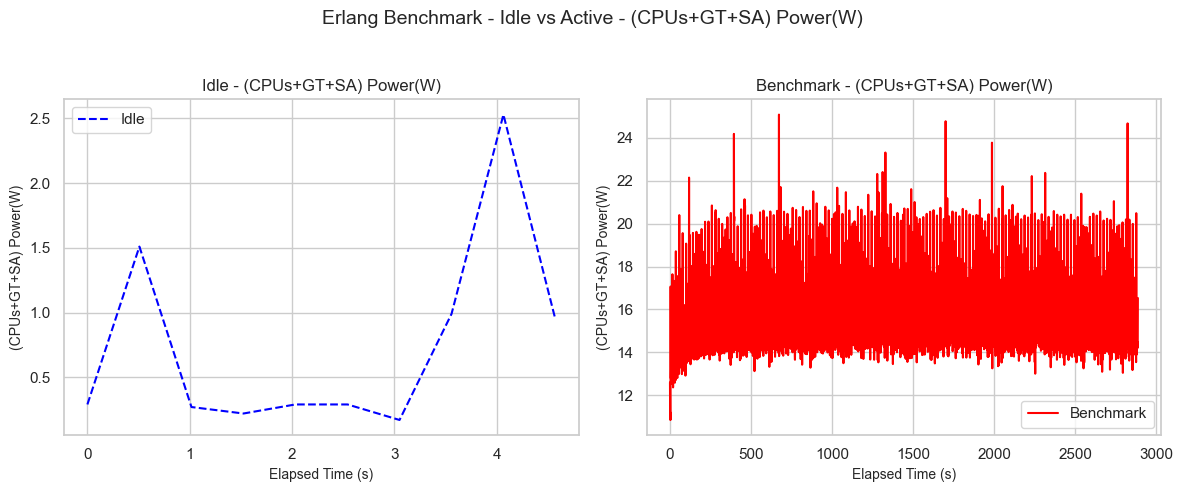

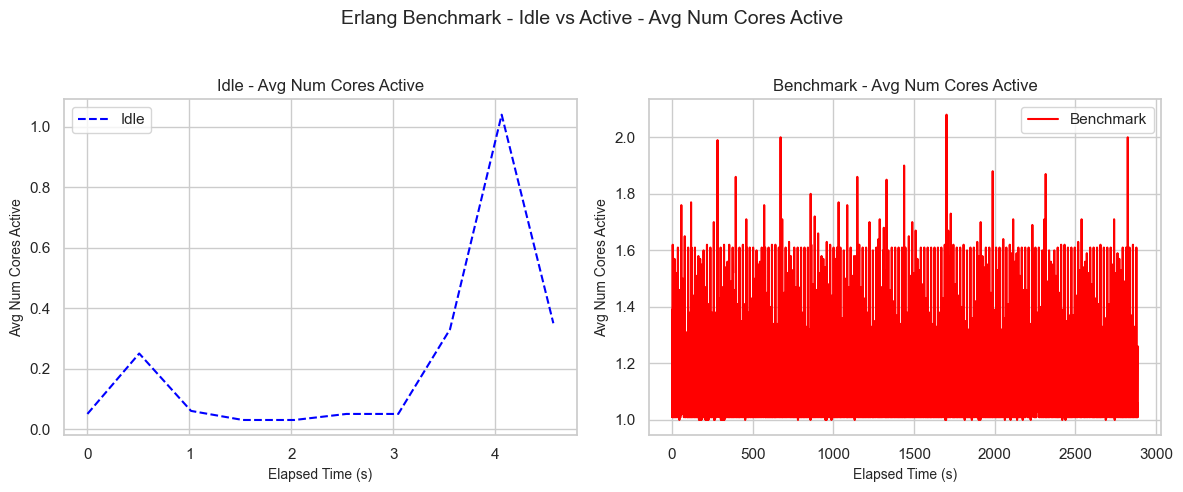

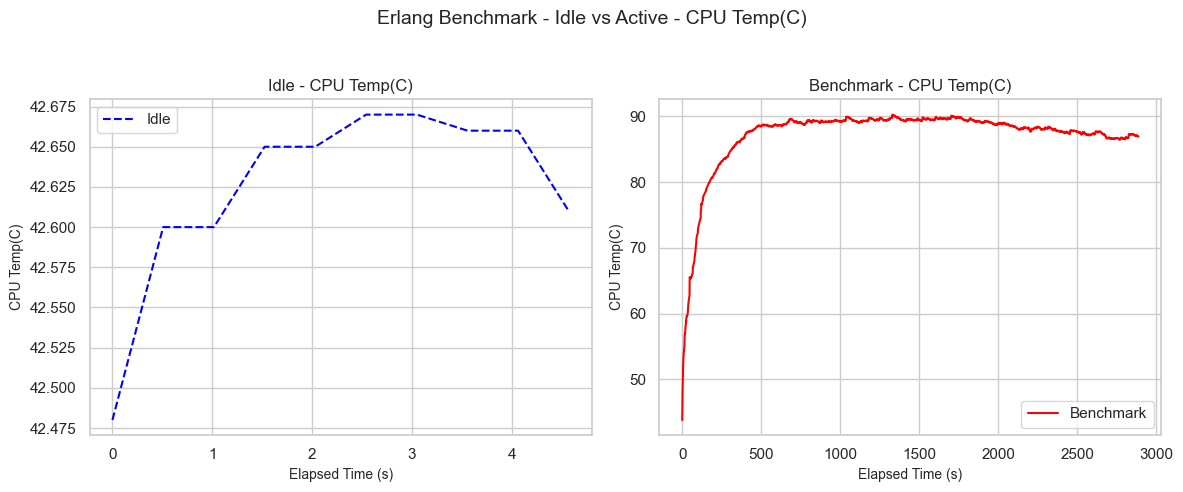

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

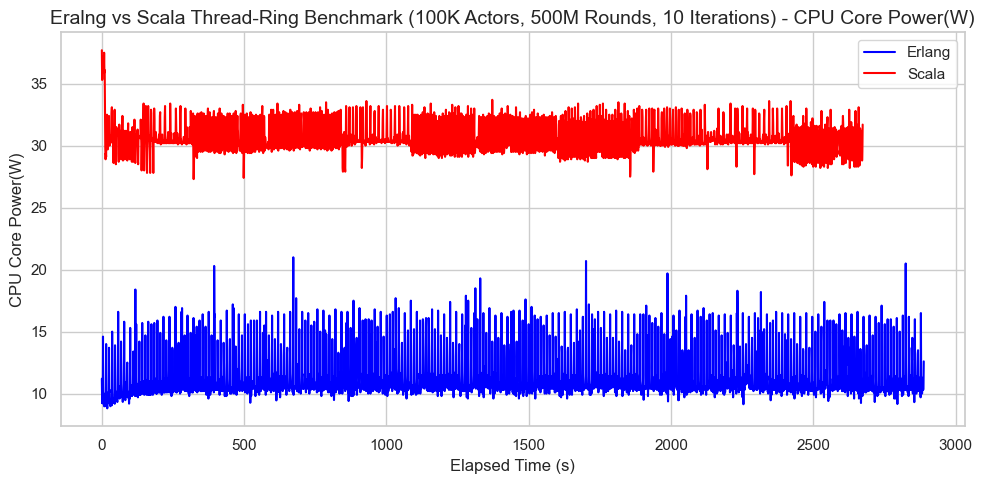

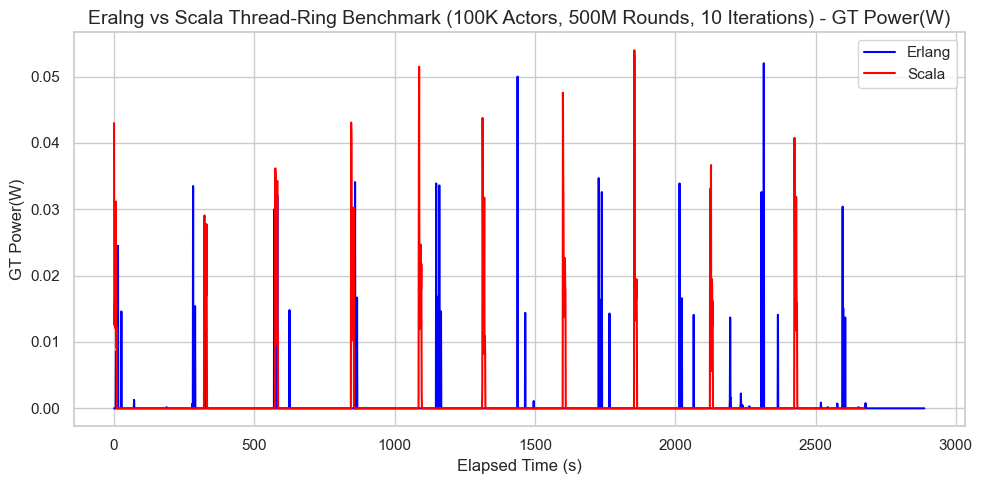

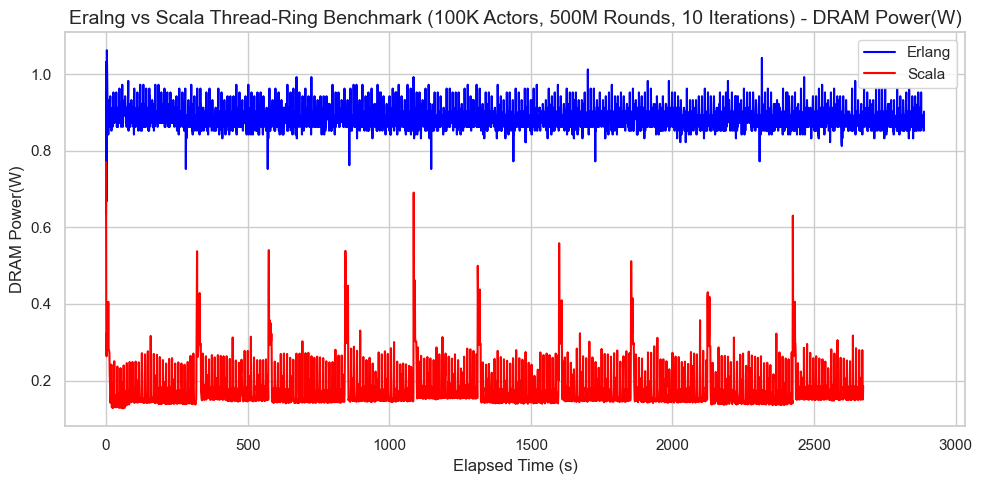

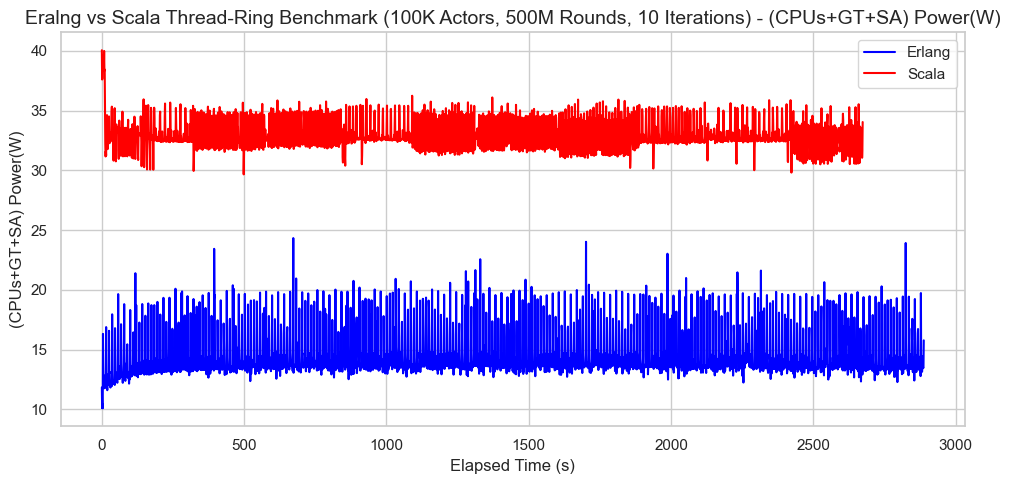

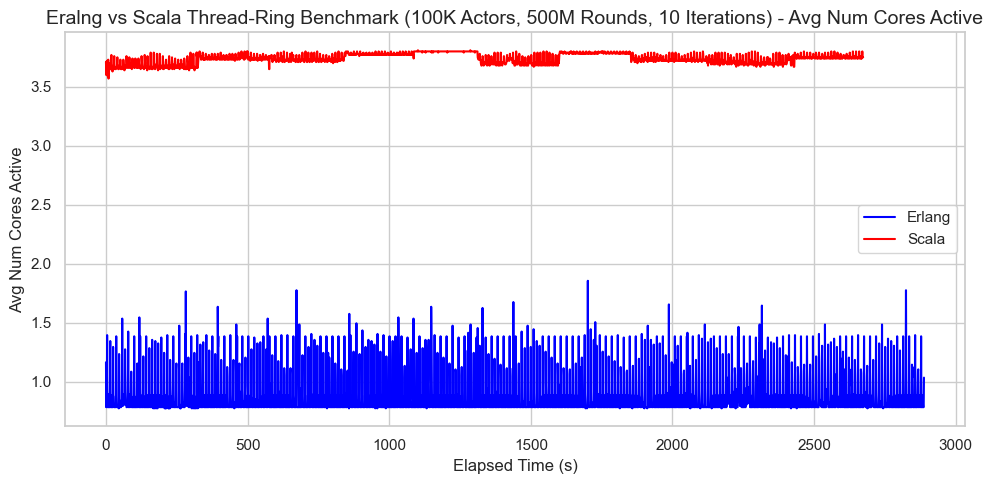

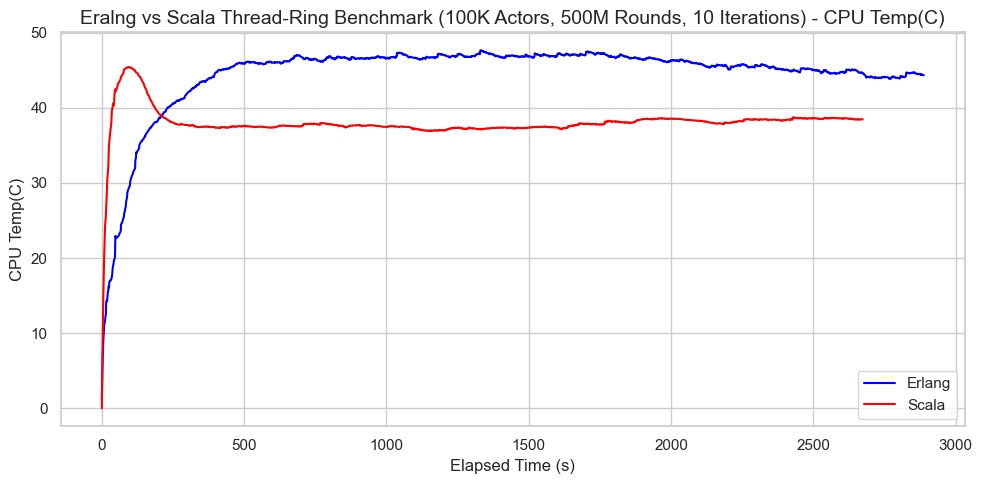

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.639541
GT Power(W)              -0.034825
DRAM Power(W)             0.174169
(CPUs+GT+SA) Power(W)    32.932428
CPU Temp(C)              37.987015
Avg Num Cores Active      3.736230
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.139866
GT Power(W)              -0.002835
DRAM Power(W)             0.886618
(CPUs+GT+SA) Power(W)    14.260953
CPU Temp(C)              44.515237
Avg Num Cores Active      0.867900
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time
scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 82401.73938383558 Joules
Erlang Benchmark: 34742.65066066497 Joules
